In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Load Libraries
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RepeatedKFold, learning_curve
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

In [ ]:
X_train = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/X_train.csv')
y_train = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/Y_train.csv')
X_test = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/X_test.csv')
y_test = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/Y_test.csv')

In [ ]:
X_train = X_train.iloc[: , 1:]
y_train = y_train.iloc[: , 1:]
X_test = X_test.iloc[: , 1:]
y_test = y_test.iloc[:,1:]

print(X_train.shape)
print(y_train.shape)

(69809, 31)
(69809, 1)


# Function to encode the categorical input variables for feature selection - prepare input data

In [ ]:
 def prepare_inputs(X_train, X_test):
   oe = OrdinalEncoder()
   oe.fit(X_train)
   X_train_enc = oe.transform(X_train)
   X_test_enc = oe.transform(X_test)
   return X_train_enc, X_test_enc

In [ ]:
 X_train_enc , X_test_enc = prepare_inputs(X_train,X_test)

ValueError: ignored

Feature Selection 1: using chi-squared feature selection

In [ ]:
#function for feature selection with chi2
# def select_features_chi2(X_train, y_train, X_test):
#   fs = SelectKBest(score_func=chi2, k='all')
#   fs.fit(X_train, y_train)
  # X_train_fs = fs.transform(X_train)
  # X_test_fs = fs.transform(X_test)
  # X_train_fs, X_test_fs = X_train, X_test
  # return X_train_fs, X_test_fs

In [ ]:
# X_train.describe()
# print(numpy.any(numpy.isnan(X_train.values)))
# print(numpy.all(numpy.isfinite(X_train.values)))

# X_train_fs, X_test_fs = select_features_chi2(X_train, y_train, X_test)

Feature selection 2: using mutual information feature selection

In [ ]:
#function for feature selection with mutual info classifier
def select_features_mutualinfo(X_train, y_train, X_test):
  fs = SelectKBest(score_func=mutual_info_classif, k='all')
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features_mutualinfo(X_train, y_train, X_test)



ValueError: ignored

Feature selection 3: using ANOVA F-statistic feature selection

In [ ]:
#function for feature selection for ANOVA
def select_features_ANOVA(X_train, y_train, X_test):
  fs = SelectKBest(score_func=f_classif, k='all')
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features_mutualinfo(X_train, y_train, X_test)

ValueError: ignored

# Plot the features (can be used for all features selections)

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(X_train_fs, y_train_fs, color ='maroon',
        width = 0.4)

plt.xlabel("X_train")
plt.ylabel("Y_train")
plt.title("Top k features in chi-squared feature selection")
plt.show()

# Function to calculate the correlation of information for feature selection - the mutual information statistics for all input variables -> to check how variables change together for the importance of features

In [ ]:
from sklearn.feature_selection import mutual_info_regression
def select_features_mutualinfo(X_train, y_train, X_test):
  fs = SelectKBest(score_func=mutual_info_regression, k='all')
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features_mutualinfo(X_train, y_train, X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_train_fs

array([[0.21055025, 0.24569758, 0.38283273, ..., 1.        , 1.        ,
        1.        ],
       [0.18862519, 0.48236922, 0.31203242, ..., 0.        , 1.        ,
        1.        ],
       [0.23186352, 0.41088948, 0.37090035, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.21657423, 0.42053847, 0.37136768, ..., 0.        , 0.        ,
        1.        ],
       [0.20433466, 0.26219351, 0.34186381, ..., 1.        , 0.        ,
        1.        ],
       [0.34449121, 0.13493326, 0.5891542 , ..., 1.        , 1.        ,
        1.        ]])

# Recursive Feature Elimination

Feature selection that score each feature and select the ones with the largest score

In [ ]:
#get the dataset
def get_dataset():
  X,y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=5, random_state=1)
  return X,y

In [ ]:
#get the needed models to evaluate
def get_models():
  models = dict()
  for i in range(2,10):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select = i )
    model = DecisionTreeClassifier()
    models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

In [ ]:
#evaluate model with cross-validation
def evaluate_model( model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=1)
  return scores

In [ ]:
#define dataset and get the models, store results
X,y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print(name, mean(scores), std(scores))

2 0.7733333333333332 0.15902480589168755


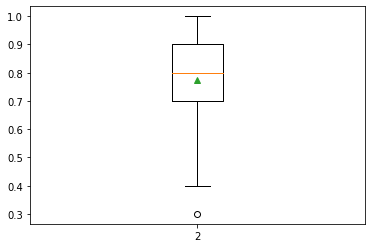

In [ ]:
#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Automatically select features with RFE

In [ ]:
#define and fit RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select = 5 )
rfe.fit(X,y)

#summarize all features
for i in range(X_train.shape[1]):
  print('Column: %d, Selected=%s, Rank: %d' % (i,rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=True, Rank: 1
Column: 1, Selected=True, Rank: 1
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=False, Rank: 5
Column: 4, Selected=False, Rank: 6
Column: 5, Selected=False, Rank: 3
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=True, Rank: 1
Column: 8, Selected=False, Rank: 4
Column: 9, Selected=False, Rank: 2


IndexError: ignored

*Data Leakage in Hyper Parameter Tuning Incorporating Cross Validation*

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

pipeline = make_pipeline(MinMaxScaler(), DecisionTreeRegressor()) 

In [ ]:
# create the grid of hyper parameters
params = {
    'decision_tree': {
        'decisiontreeregressor__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'decisiontreeregressor__splitter': ['best','random'],
        'decisiontreeregressor__max_depth': [10, 20, 30, 40, 50, 100, 150],
        'decisiontreeregressor__max_features': ['auto', 'sqrt', 'log2'],
    }
    
}
# define the cross validation using RepeatedKFold (10 folds 10 repeats)
cross_val = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)
# define the grid search CV 
gridsearch_cv = GridSearchCV(estimator=pipeline, param_grid=params['decision_tree'], cv=cross_val)
# start training
gridsearch_cv.estimator.get_params().keys()
gridsearch_cv.fit(X_train, y_train)

In [ ]:
def parameters_trans(best_parameters):
    new_best = {}
    for key, val in best_parameters.items():
        new_key = key.split("__")[1]
        new_best[new_key] = val
    return new_best

In [ ]:
best_params = parameters_trand(grid_search_cv.best_params_)
print(best_params)

In [ ]:
MAX_DEPTH = 10
MAX_FEATURES = 'sqrt'
SPLITTER = 'random'
CRITERION = 'friedman_mse'
clf = DecisionTreeRegressor(criterion=CRITERION, splitter = SPLITTER,
                            max_depth = MAX_DEPTH, max_features = MAX_FEATURES)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", r2_score(y_test, y_pred))

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, 
                        train_sizes=np.linspace(0.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 1)

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y,
        cv=cv,
        scoring='r2', 
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")
    return plt

In [ ]:
model_dtr = DecisionTreeRegressor(**best_params)
plot_learning_curve(model_dtr, "Learning Curve for DTR", 
                   X = X_train, y = y_train, cv = cross_val)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)